In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [2]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [3]:
batch_size = 100
num_epochs = 3
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(3,3), stride=1, bias=False)
        self.relu1 = nn.ReLU()
        
        # Max pool
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(1014, 84, bias=False) 
        self.relu2 = nn.ReLU()
        self.fc2 = nn.Linear(84, 10, bias=False) 
    
    def forward(self, x):
        
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Resize
        out = out.view(out.size(0), -1)

        # Fully connected layer
        out = self.fc1(out)
        out = self.fc2(out)
        
        return out

In [5]:
model = CNNModel()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
print(model)

CNNModel(
  (cnn1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1014, out_features=84, bias=False)
  (relu2): ReLU()
  (fc2): Linear(in_features=84, out_features=10, bias=False)
)


In [6]:
import time
import torch
import psutil

def get_memory_usage():
    return psutil.Process().memory_info().rss / 1024 ** 2  # Memory usage in MB

for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_memory_before = get_memory_usage()
    iter = 0
    for i, (images, labels) in enumerate(train_loader):
        # Load images
        images = images.requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 600 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images
                images = images.requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum().item()  # Convert tensor to a number

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

    epoch_end_time = time.time()
    epoch_memory_after = get_memory_usage()

    # Print time and memory usage for the epoch
    print('Epoch: {}. Time: {:.2f} seconds. Memory Usage: {:.2f} MB'.format(
        epoch + 1, epoch_end_time - epoch_start_time, epoch_memory_after - epoch_memory_before))


Iteration: 600. Loss: 0.5086715221405029. Accuracy: 87.93
Epoch: 1. Time: 9.36 seconds. Memory Usage: 25.48 MB
Iteration: 600. Loss: 0.2748609781265259. Accuracy: 90.49
Epoch: 2. Time: 10.75 seconds. Memory Usage: 0.03 MB
Iteration: 600. Loss: 0.29887354373931885. Accuracy: 90.9
Epoch: 3. Time: 9.40 seconds. Memory Usage: 0.04 MB


Współczynniki w: [ 0.49993846 -0.25009231]
Wyraz wolny b: 1.2502564102564102


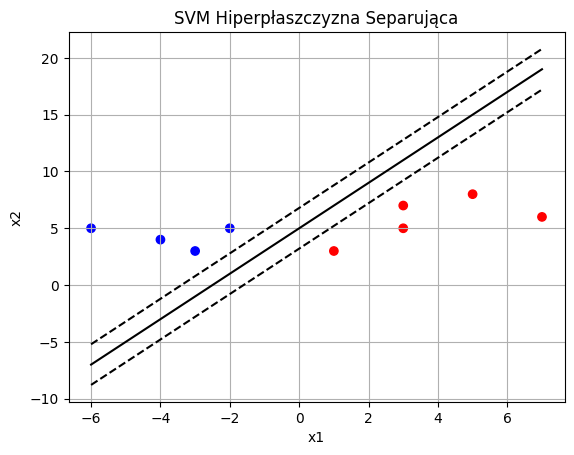

In [1]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Punkty danych i etykiety
X = np.array([[-6, 5], [-2, 5], [-4, 4], [-3, 3],
              [1, 3], [3, 5], [3, 7], [5, 8],[7,6]])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1, 1])

# Trening SVM z jądrem liniowym
clf = svm.SVC(kernel='linear', C=1e5)
clf.fit(X, y)

# Parametry hiperpłaszczyzny
w = clf.coef_[0]
b = clf.intercept_[0]

print("Współczynniki w:", w)
print("Wyraz wolny b:", b)

# Rysowanie punktów i hiperpłaszczyzny
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o')

# Rysowanie hiperpłaszczyzny
x1 = np.linspace(-6, 7, 200)
x2 = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2, 'k-')

# Rysowanie marginesów
margin = 1 / np.sqrt(np.sum(w ** 2))
x2_margin_positive = x2 + margin
x2_margin_negative = x2 - margin
plt.plot(x1, x2_margin_positive, 'k--')
plt.plot(x1, x2_margin_negative, 'k--')

# Konfiguracja wykresu
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Hiperpłaszczyzna Separująca')
plt.grid(True)
plt.show()
